ml-100k
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
   0                  1            2   3   \
0   1   Toy Story (1995)  01-Jan-1995 NaN   
1   2   GoldenEye (1995)  01-Jan-1995 NaN   
2   3  Four Rooms (1995)  01-Jan-1995 NaN   
3   4  Get Shorty (1995)  01-Jan-1995 NaN   
4   5     Copycat (1995)  01-Jan-1995 NaN   

                                                  4   5   6   7   8   9   ...  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...   0   0   0   1   1  ...   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...   0   1   1   0   0  ...   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...   0   0   0   0   0  ...   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...   0   1   0   0   0  ...   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)   0   0   0   0   0  ...   



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


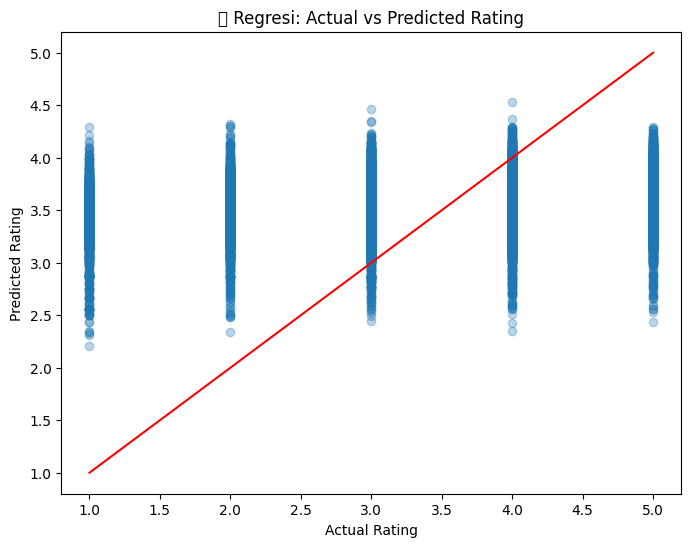

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


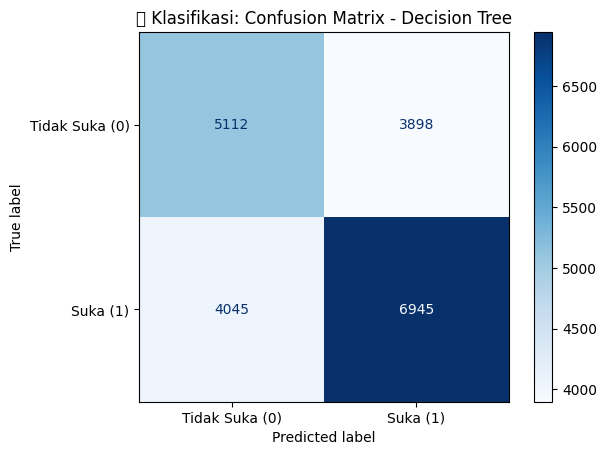

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


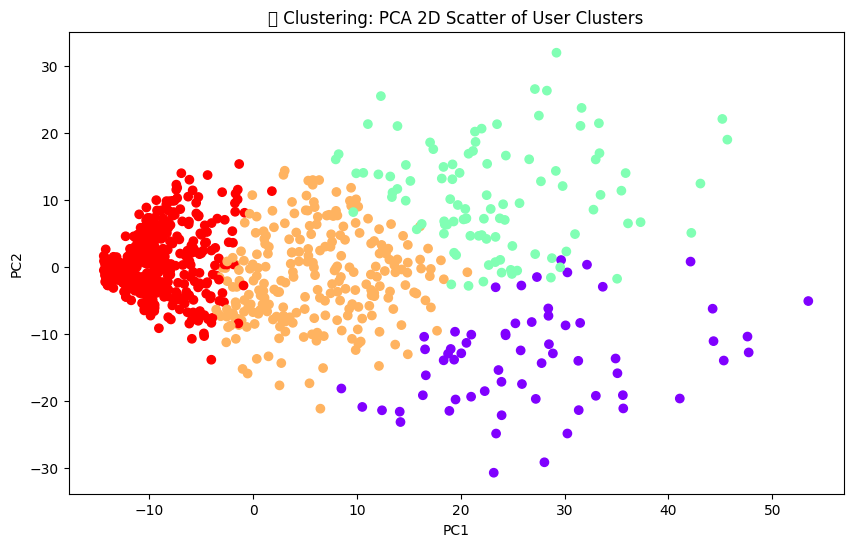

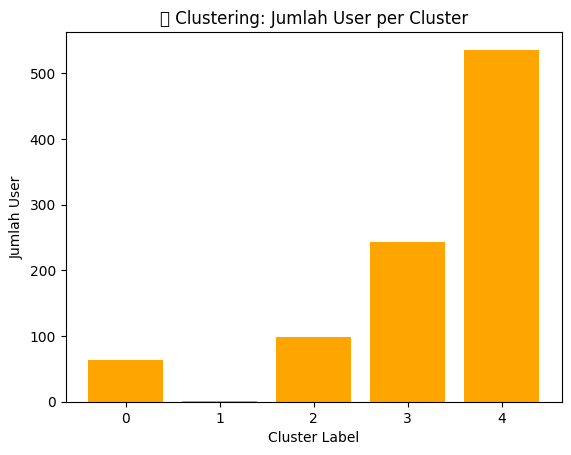

In [ ]:
# Install libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, silhouette_score

import zipfile

# Ekstrak ZIP
with zipfile.ZipFile("/content/ml-100k.zip", "r") as zip_ref:
    zip_ref.extractall("/content/ml-100k")

# Cek file
!ls /content/ml-100k

# Load data
ratings = pd.read_csv("/content/ml-100k/ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])
items = pd.read_csv("/content/ml-100k/ml-100k/u.item", sep="|", header=None, encoding="latin-1")
users = pd.read_csv("/content/ml-100k/ml-100k/u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip_code"])

# Cek data
print(ratings.head())
print(items.head())
print(users.head())

# Pilih genre info & item_id
genre_cols = ["unknown", "Action", "Adventure", "Animation",
              "Children's", "Comedy", "Crime", "Documentary", "Drama",
              "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery",
              "Romance", "Sci-Fi", "Thriller", "War", "Western"]

items_genre = items[[0] + list(range(5, 24))]
items_genre.columns = ["item_id"] + genre_cols

# Merge ratings + genre + users
df = pd.merge(ratings, items_genre, on="item_id")
df = pd.merge(df, users, on="user_id")

# Cek data setelah join
df.head()

# Encode gender ke numerik
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

# One-hot encoding pada kolom occupation
df = pd.get_dummies(df, columns=['occupation'])

# Cek hasil
df.head()

from sklearn.preprocessing import MinMaxScaler

# Scaling age ke range 0-1
scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']])

# Cek hasil scaling age
df[['age']].describe()

# Fitur: genre + profil user
feature_cols = genre_cols + ['age', 'gender'] + [col for col in df.columns if 'occupation_' in col]

X = df[feature_cols]

# Target regresi: rating
y_reg = df['rating']

# Target klasifikasi: suka (>3.5)
y_clf = (df['rating'] > 3.5).astype(int)

# Split train-test
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Cek bentuk fitur & target
print("X shape:", X.shape)
print("y_reg shape:", y_reg.shape)
print("y_clf shape:", y_clf.shape)

# Cek distribusi target klasifikasi
print("Distribusi suka (1) dan tidak suka (0):")
print(y_clf.value_counts())

# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train_reg)
y_pred_reg = reg.predict(X_test)

# Evaluasi regresi
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train_clf)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test_clf, y_pred_dt)
f1_dt = f1_score(y_test_clf, y_pred_dt)
print(f"Decision Tree - Accuracy: {acc_dt:.4f}, F1: {f1_dt:.4f}")

# SVM
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=5000)  # tambahkan max_iter agar converge
svm.fit(X_train, y_train_clf)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test_clf, y_pred_svm)
f1_svm = f1_score(y_test_clf, y_pred_svm)
print(f"Linear SVM - Accuracy: {acc_svm:.4f}, F1: {f1_svm:.4f}")

# KNN (k=3 s/d 15)
best_k = 3
best_acc = 0

for k in range(3, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_clf)
    y_pred_knn = knn.predict(X_test)
    acc = accuracy_score(y_test_clf, y_pred_knn)
    if acc > best_acc:
        best_acc = acc
        best_k = k
    print(f"KNN (k={k}) - Acc: {acc:.4f}, F1: {f1_score(y_test_clf, y_pred_knn):.4f}")

print(f"Best K for KNN: {best_k} with Accuracy: {best_acc:.4f}")

# Matriks user-item
user_item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(user_item_matrix)

# Evaluasi clustering
silhouette = silhouette_score(user_item_matrix, clusters)
print(f"Silhouette Score: {silhouette:.4f}")

# ========================
# VISUALISASI MODEL
# ========================

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# ------------------------
# 1️. Visualisasi Regresi: Actual vs Predicted
# ------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.plot([1, 5], [1, 5], color='red')  # Garis ideal
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("🔵 Regresi: Actual vs Predicted Rating")
plt.show()

# ------------------------
# 2️. Visualisasi Klasifikasi: Confusion Matrix (Contoh Decision Tree)
# ------------------------
cm_dt = confusion_matrix(y_test_clf, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["Tidak Suka (0)", "Suka (1)"])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("🟢 Klasifikasi: Confusion Matrix - Decision Tree")
plt.show()

# ------------------------
# 3️. Visualisasi Clustering: PCA Scatter 2D
# ------------------------
pca = PCA(n_components=2)
user_item_pca = pca.fit_transform(user_item_matrix)

plt.figure(figsize=(10, 6))
plt.scatter(user_item_pca[:,0], user_item_pca[:,1], c=clusters, cmap='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("🟣 Clustering: PCA 2D Scatter of User Clusters")
plt.show()

# ------------------------
# 4️. Visualisasi Clustering: Bar Chart Cluster Size (Opsional)
# ------------------------
unique, counts = np.unique(clusters, return_counts=True)
plt.bar(unique, counts, color='orange')
plt.xlabel("Cluster Label")
plt.ylabel("Jumlah User")
plt.title("🟣 Clustering: Jumlah User per Cluster")
plt.show()

